In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
df = pd.read_csv('Titanic.csv')

In [43]:
df.dropna(inplace=True)

In [44]:
X = df.drop(columns=['Survived','Name'],axis = 1)
y = df['Survived']

In [45]:
X.head()

,PClass,Age,Sex
0,1st,29.00,female
1,1st,2.00,female
2,1st,30.00,male
3,1st,25.00,female
4,1st,0.92,male


In [46]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
X['Sex'] = enc.fit_transform(X['Sex'])
X['PClass'] = enc.fit_transform(X['PClass'])

In [47]:
X.head()

,PClass,Age,Sex
0,0,29.00,0
1,0,2.00,0
2,0,30.00,1
3,0,25.00,0
4,0,0.92,1


In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,random_state=42)
X_train.shape
X_train = np.array(X_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
y_train = np.array(y_train)

In [49]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42,n_jobs=-1,max_depth = 5,n_estimators = 100,oob_score = True)

In [50]:
%%time
classifier_rf.fit(X_train,y_train)

CPU times: user 273 ms, sys: 24.9 ms, total: 298 ms
Wall time: 287 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [51]:
classifier_rf.oob_score_

0.8015122873345936

In [52]:
classifier_rf.score(X_test,y_test)

0.7841409691629956

# Grid Search

In [53]:
rf = RandomForestClassifier(random_state=42,n_jobs = -1)

In [59]:
params = {
    'max_depth' : [2,3,5,10,20],
    'min_samples_leaf':[5,10,20,50,100,200],
    'n_estimators':[10,25,30,50,100,200]
}

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
grid_search = GridSearchCV(estimator=rf,param_grid=params,cv = 4,n_jobs=-1,verbose = 1,scoring = "accuracy") # verbose is the number of details that you require with the output

In [57]:
%%time
grid_search.fit(X_train,y_train)


Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: user 2.28 s, sys: 255 ms, total: 2.53 s
Wall time: 1min 38s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [58]:
grid_search.best_score_

0.8241626794258373

In [60]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=3, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

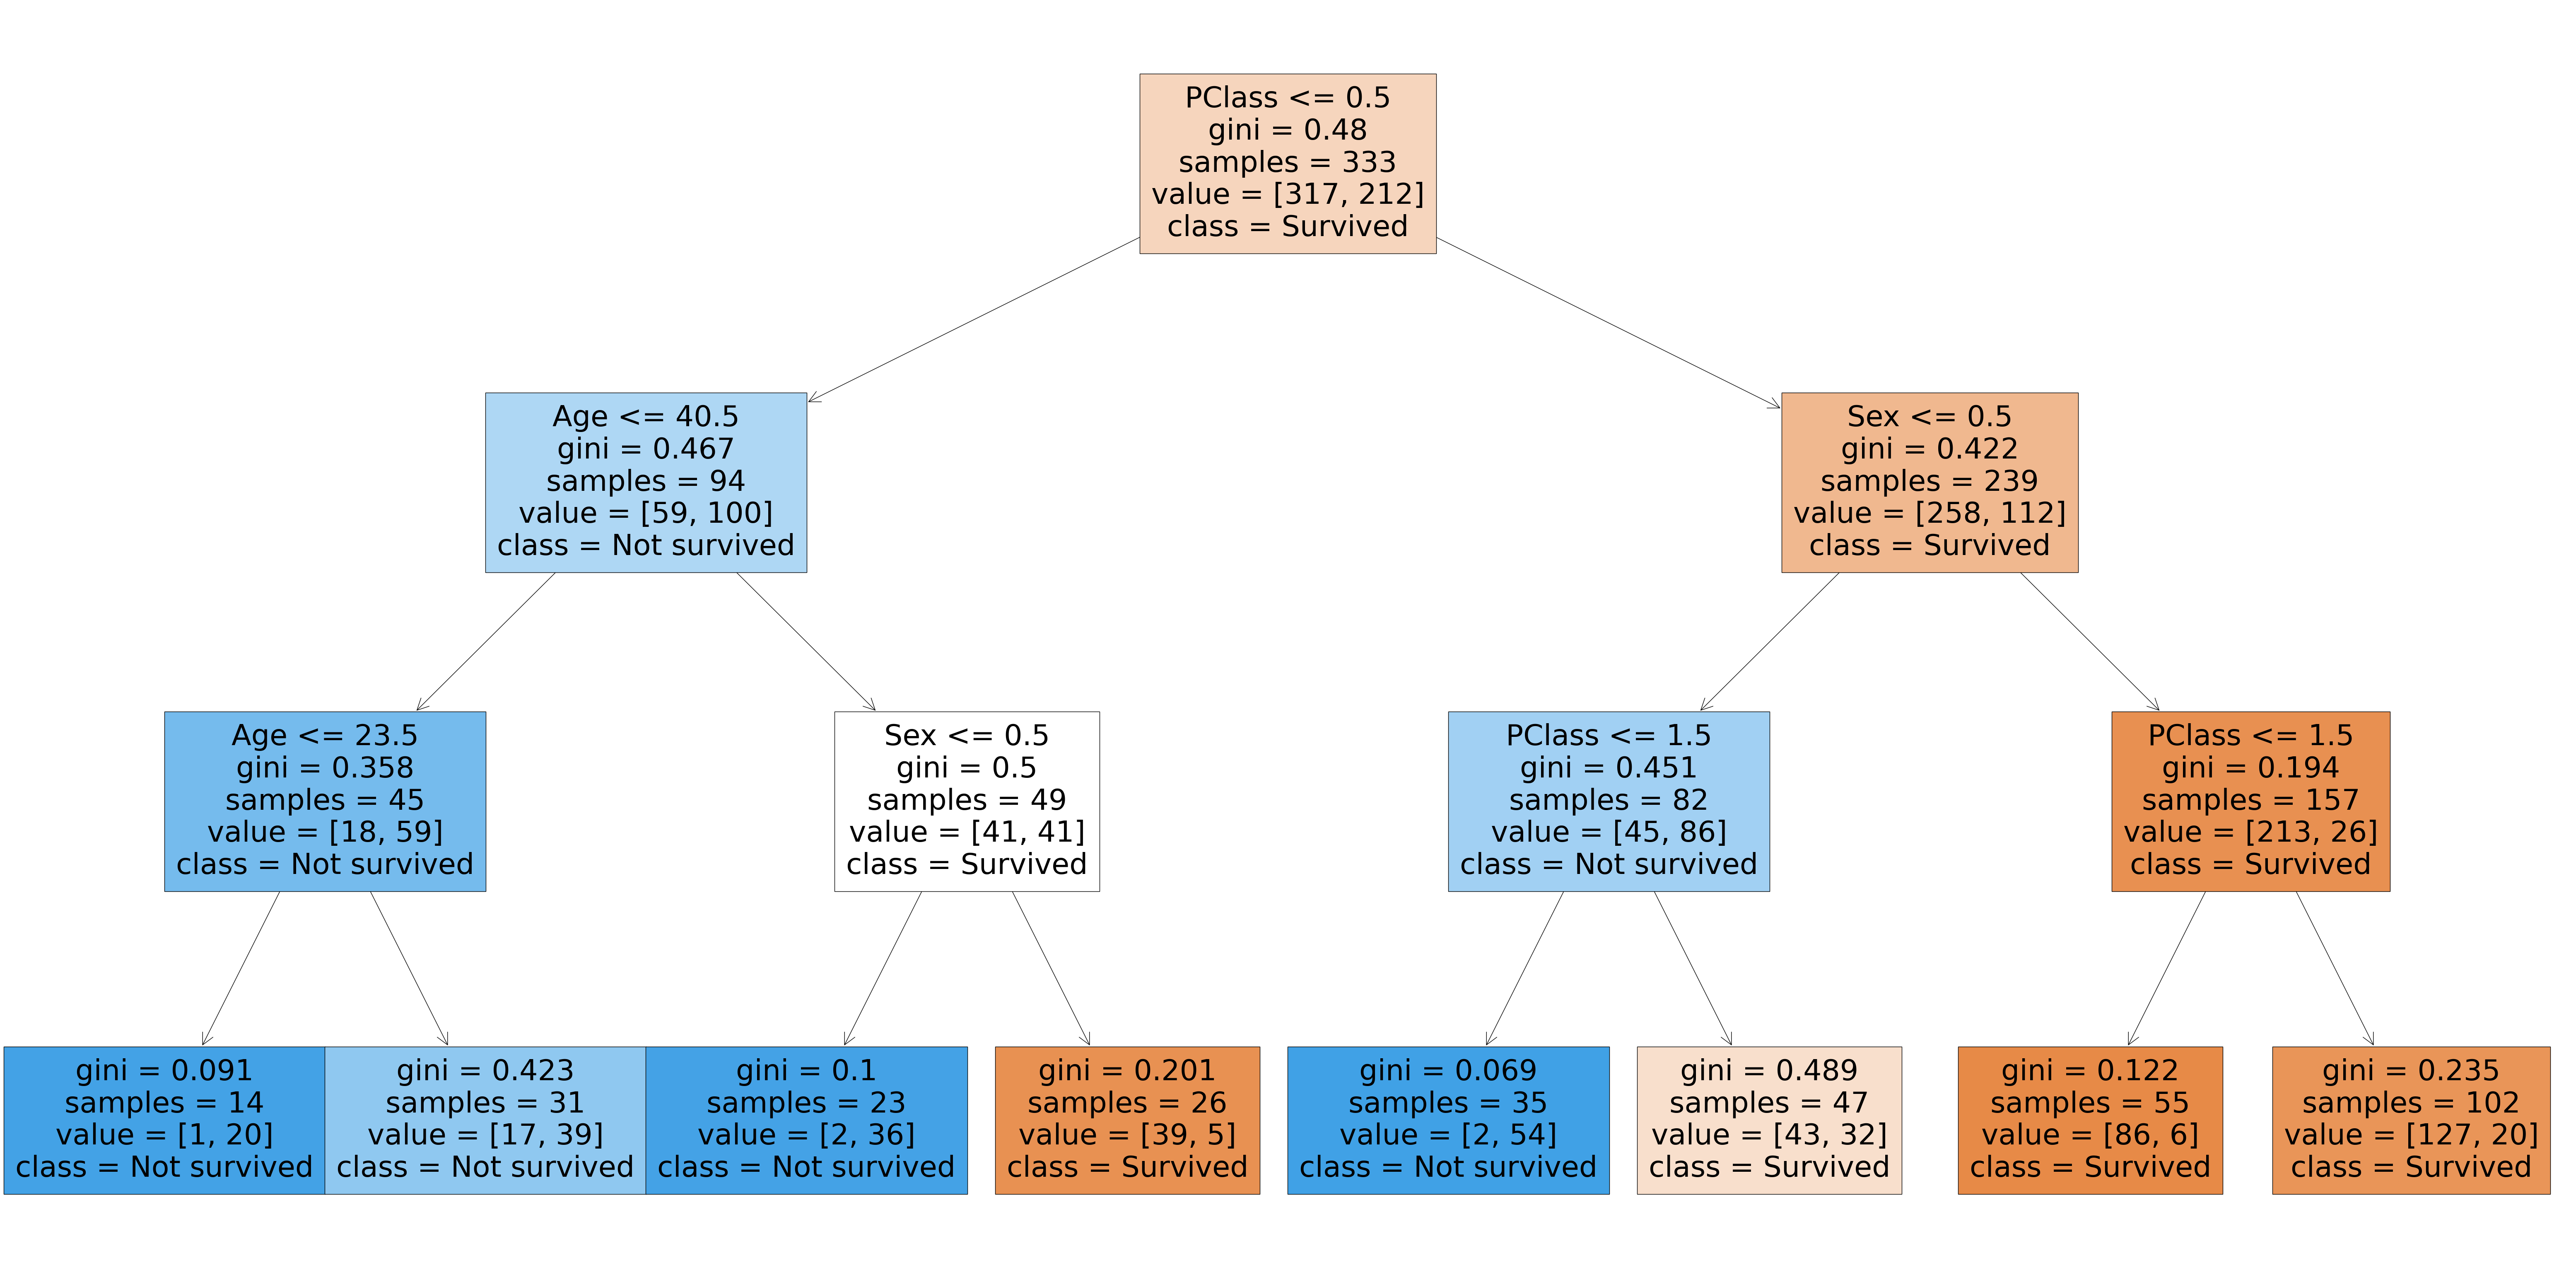

In [61]:
 from sklearn.tree import plot_tree
 plt.figure(figsize=(80,40))
 plot_tree(rf_best.estimators_[9], feature_names = X.columns,class_names=['Survived', "Not survived"],filled=True);

In [62]:
rf_best.feature_importances_

array([0.25010842, 0.23431529, 0.51557629])

# Random Search

In [64]:
from sklearn.model_selection import RandomizedSearchCV

In [68]:
from scipy.stats import randint
rs_space={ 'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
 }

In [69]:
rf_random = RandomizedSearchCV(rf, rs_space, n_iter=50, scoring='accuracy', n_jobs=-1, cv=4)

In [71]:
%%time
model_random = rf_random.fit(X_train, y_train)

CPU times: user 1.94 s, sys: 268 ms, total: 2.21 s
Wall time: 1min 25s


In [72]:
model_random.best_params_

{'criterion': 'gini',
 'max_depth': 60,
 'max_features': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 410}

In [73]:
model_random.best_score_

0.8108766233766234

In [74]:
rf_best1 = model_random.best_estimator_
rf_best1

RandomForestClassifier(max_depth=60, max_features=6, min_samples_leaf=2,
                       min_samples_split=8, n_estimators=410, n_jobs=-1,
                       random_state=42)